<a href="https://colab.research.google.com/github/hyj378/011/blob/ML_basic_inyt/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

위와 같은 오류는 tf.logging을 통해 해결 할 수 있습니다.

참조 링크 : [stackoverflow](https://stackoverflow.com/questions/49901806/tensorflow-importing-mnist-warnings)

참조 링크: [tf.logging](https://www.tensorflow.org/api_docs/python/tf/logging)

In [46]:
import numpy as np
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data #mnist데이터 불러오기
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## softmax 함수 복습

sigmoid를 통해 분류하지만,
데이터가 multinomial한 것

즉, multinomial한 데이터를 matrix와
sigmoid를 통해 분류하는 것

####softmax함수의 cost

sigmoid함수의 cost처럼 log를 이용한다.

명칭은 cross-entropy이다![cross-entropy](https://t1.daumcdn.net/cfile/tistory/225C5E4F5797F9C42B)

*********************************************

##sigmoid

0, 1분류를 위한 기준을 찾을때, 범위가 너무 큰 y를
지수함수 e^x를 이용해 압축하는것

####sigmoid함수의 cost함수

-y*log(H(x)) - (1-y)*log(1-H(x))

(H(x)는 0, 1로 구성된 예측값)
e^x를 취했을 때 예측할 수 있듯이 cost함수를 위해
log를 이용한다.

************************************************
오랫만에 강의를 들어서 헷갈리는것이 많아 주석을 많이 달았습니다 혹시 틀린 부분 있나요?

In [0]:
#함수 노드 생성

nb_classes = 10 #0, 1, 2, ... 9

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
#sigmoid 함수 W와 b를 예측해 하나의 예측 Linear모델을 만든 후 e^x로 변환한다
#hypothesis함수를 optimizer함수를 통해 최적화 시킴으로서 모델을 생성한다
hypothesis = tf.nn.softmax(tf.matmul(x, W)+b)

#cost (cross-entropy) axis 1(행별로 더한다)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

#예측값과 hypothesis와 y행렬의 원소중 최댓값(1차원으로 반환??)의 인덱스를 비교한다.
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(y, 1))
#정확도 is_correct가 반환한 true, false값을 float32로 cast해 평균내기
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [54]:
#노드 그래핑, 데이터 입력해 주기

training_epochs = 15 #트레이닝 반복 횟수 (전체 데이터 set을 몇번 학습시킬것인지)
batch_size = 100 #한번에 입력될 데이터 사이즈

cost_change = []
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer()) # Variable변수 초기화
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size) 
    #total_batch* batch_size = 총 데이터size
    
    #데이타 1epoch 학습
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict={x: batch_xs, y: batch_ys})
      avg_cost += c/total_batch
      
    cost_change.append(avg_cost)
    print('Epoch: ', '%04d'%(epoch+1), '회차 시도', 'cost =','{:.9f}.'.format(avg_cost)) 
  print('학습종료\n')
  
  #테스트 데이타를 통한 모델 평가

  print("Accuracy: ",accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
  #학습시키는 것이 아니므로 optimizer를 실행 할 필요가 없다
  #accuracy만 실행시키면 되므로 sess.run말고 tensor명.eval()을 이용한다
  #하나의 노드(텐서)만 실행 시킬때 유용

Epoch:  0001 회차 시도 cost = 2.909779226.
Epoch:  0002 회차 시도 cost = 1.095461600.
Epoch:  0003 회차 시도 cost = 0.872188514.
Epoch:  0004 회차 시도 cost = 0.764765285.
Epoch:  0005 회차 시도 cost = 0.696965522.
Epoch:  0006 회차 시도 cost = 0.649608724.
Epoch:  0007 회차 시도 cost = 0.613157236.
Epoch:  0008 회차 시도 cost = 0.584405981.
Epoch:  0009 회차 시도 cost = 0.560808409.
Epoch:  0010 회차 시도 cost = 0.540953570.
Epoch:  0011 회차 시도 cost = 0.523121198.
Epoch:  0012 회차 시도 cost = 0.508659811.
Epoch:  0013 회차 시도 cost = 0.494903517.
Epoch:  0014 회차 시도 cost = 0.483442732.
Epoch:  0015 회차 시도 cost = 0.472563617.
학습종료

Accuracy:  0.8927


제가 처음에 그래프를 그리려고 아래
x= range(1, 16)으로 했는데
unhashable type: 'list' 오류가 나더군요
(위에서 x는 Variable였는데 다시 list형으로 재정의한 셈이죠)

아주 기본적인 실수지만 익숙하지 않은 만큼 저랑 같은 오류를 겪으시는 분이 계실 수도 있을 것 같아요 그러지 않도록 변수명 조심하세요!

cost 변화율


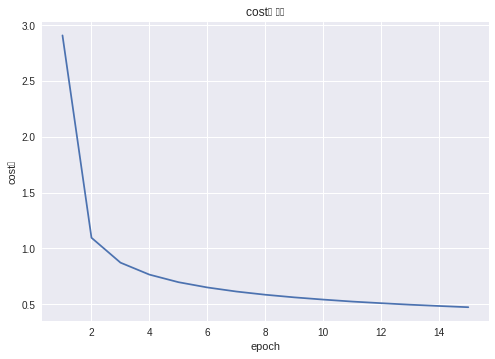

cost가 줄어듬을 알 수 있다


In [55]:
print('cost 변화율')


import matplotlib.pyplot as plt

x_epoch = range(1, 16) # epoch값
y_cost = cost_change
plt.plot(x_epoch, y_cost)

plt.xlabel('epoch')
plt.ylabel('cost값')

plt.title("cost의 변화")
plt.show()
print("cost가 줄어듬을 알 수 있다")

Label: [7]
Prediction: [2]


<function matplotlib.pyplot.show>

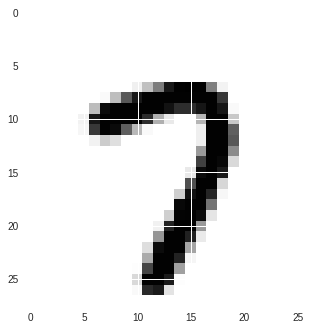

In [58]:
#matplotlib이용해 직접 결과 보기
import matplotlib.pyplot as plt #위에서 import했지만... 보기좋게 다시합니다
import random

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#numpy.random.randint(low, high=None, size=None, dtype='l')
#0과 mnist데이터의 갯수 사이의 임의의 난수(r)를 생성합니다.
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
#r번째 데이터의 실제 값을 출력합니다
print("Prediction:", sess.run(tf.argmax(hypothesis, 1),\
  feed_dict={x: mnist.test.images[r:r+1]})) #예측만 할꺼니 label정보는 필요 없죠...

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
plt.show